

Lien des données : https://www.kaggle.com/datasets/anmolkumar/machine-hack-melanoma-tumor-size-prediction


***1ère étape***


 - Charger les données 
 - Exploration statistique : trouver si il y'a des valeurs manquantes et les éliminer si besoin, tests d'anova pour déterminer les corrélations entre variables et tumor_size

In [201]:
#Importation des modules
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [202]:
#chargement des données 
#train_set = pd.read_csv('train.csv')
#train_set.head()

regression_train = pd.read_csv('/Users/nada/Regression/train.csv', delimiter=',')
regression_train.head()



,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [203]:

# #ouverture du csv train
# with open('train.csv', 'r') as fichier:
#     train_csv = csv.reader(fichier)
#     #sauter la première ligne
#     next(train_csv)
#     tableau_train_sans_première_ligne = [ligne[:] for ligne in train_csv]

# #conversion en matrice numpy
# tableau_np = np.array(tableau_train_sans_première_ligne, dtype=float) 
# X_train = np.array(tableau_np[:,:-1], dtype=float) 
# Y_train = np.array(tableau_np[:,-1], dtype=float)
# #.reshape([9146,1]

# #ouverture du csv test et sample_submission
# with open('test.csv', 'r') as fichier:
#     test_csv = csv.reader(fichier)
#     #sauter la première ligne
#     next(test_csv)
#     tableau_test_sans_première_ligne = [ligne[:] for ligne in test_csv]

# #conversion en matrice numpy
# X_test = np.array(tableau_test_sans_première_ligne, dtype=float)

# with open('sample_submission.csv', 'r') as fichier:
#     sample_csv = csv.reader(fichier)
#     #sauter la première ligne
#     next(sample_csv)
#     tableau_sample_sans_première_ligne = [ligne[:] for ligne in sample_csv]

# Y_test = np.array(tableau_sample_sans_première_ligne, dtype=float) 

# #affichage du format de chaque matrice
# print(X_train.shape)
# print(Y_train.shape)
# print(X_test.shape)
# print(Y_test.shape)


In [204]:
#2eme tentative
df = pd.read_csv('train.csv')
df.head()

X = df.drop(columns=['tumor_size'])
X.head()


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200


In [205]:
y = df.loc[:,['tumor_size']]
y.head()

,tumor_size
0,14.103
1,2.648
2,1.688
3,3.796
4,18.023


In [206]:
X_t = pd.read_csv('test.csv')
X_t.head()


,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
0,4946.44,914.06,0.18479,54.5566,6.628345e+05,67.0525,2301.76,22,41.9554
1,5613.85,1629.12,0.29019,51.5524,7.842271e+05,80.1986,3235.00,48,40.7410
2,12421.10,3062.41,0.24654,154.1560,1.763575e+06,186.8590,4684.63,63,29.4778
3,6830.77,2457.66,0.35979,56.8995,9.296623e+05,92.7361,3211.93,42,38.5027
4,33407.80,12353.60,0.36978,219.0740,4.595871e+06,493.3370,13389.36,187,26.8449


In [207]:
y_t = pd.read_csv('sample_submission.csv')
y_t.head

<bound method NDFrame.head of        tumor_size
0        3.418762
1        7.348026
2        3.096391
3       10.489805
4       27.416072
...           ...
36579    6.980089
36580    7.591675
36581    7.315385
36582    4.724118
36583    3.169346

[36584 rows x 1 columns]>

On voit ici qu'il n'ya pas de valeurs null. 

In [208]:
#Description des données
regression_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


In [209]:
#Est-ce qu'il y'a des valeurs manquantes? 
regression_train.isnull().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

In [210]:
print(regression_train.loc[949,:])

mass_npea         8.311310e+03
size_npear        2.211760e+03
malign_ratio      2.661100e-01
damage_size       7.703410e+01
exposed_area      1.139238e+06
std_dev_malign    9.202030e+01
err_malign        3.460370e+03
malign_penalty    3.300000e+01
damage_ratio      3.684210e+01
tumor_size        0.000000e+00
Name: 949, dtype: float64


In [211]:

# #Est-ce qu'il y a des valeurs nulles ou NaN ?
# print("Nombre de valeurs nulles:", X_train.size-np.count_nonzero(X_train))

#afficher les lignes où il y'a un zéro
lignes_avec_zeros = regression_train[regression_train.eq(0).any(axis=1)]
print("Les lignes contenant un 0 sont: \n",lignes_avec_zeros)
print("Nombre de lignes contenant un 0:", len(lignes_avec_zeros))

colonnes_avec_zeros = regression_train.columns[regression_train.eq(0).any()]
print("Les colonnes contenant un 0 sont: \n",colonnes_avec_zeros)

Les lignes contenant un 0 sont: 
       mass_npea  size_npear  malign_ratio  damage_size  exposed_area  \
96      8993.44     3126.25       0.34761      90.1403  1.271112e+06   
113     6185.42     1394.40       0.22543      66.8706  8.215469e+05   
117     3473.80     1184.87       0.34108      27.3092  4.752986e+05   
211    19155.90     4961.06       0.25898     226.0460  2.627052e+06   
333    12047.30     2858.21       0.23724     145.5430  1.715849e+06   
701     6387.60     1762.43       0.27591      35.8124  8.682936e+05   
770    12796.60     2887.59       0.22565     160.7500  1.795759e+06   
949     8311.31     2211.76       0.26611      77.0341  1.139238e+06   
1072    9061.49     1926.35       0.21258      94.2186  1.278207e+06   
1083    6355.88     1751.00       0.27549      68.1871  8.499504e+05   
1207    4574.16      920.47       0.20123      41.1086  6.539223e+05   
1307    8396.52     1872.11       0.22296      76.7535  1.185871e+06   
1438    6108.28     2004.75   

On a décidé de ne pas supprimer les lignes où il y'a un zéro, car ils ne spécifient nul part que ce sont des fausses valeurs. De plus, cela ne représente que 56 lignes sur 9146.
Cependant, cela reste incohérent --> le damage_size n'est pas nul pour les lignes où tumor_size est nul.

**Calcul de corrélation**
On a 9 variables et on veut tester leur corrélation avec tumor_size.

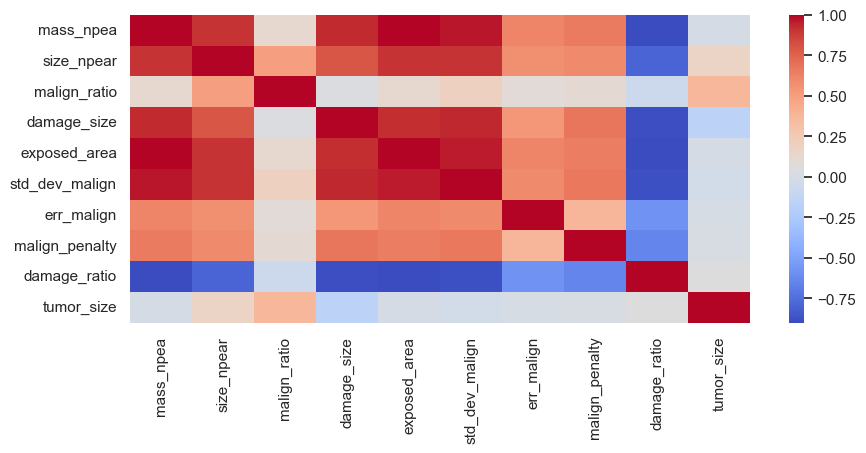

In [212]:
#mass_npea
#size_npear
#malign_ratio
#damage_size
#exposed_area
#std_dev_malign
#err_malign
#malign_penalty
#damage_ratio

import seaborn as sns

sns.set(rc={'figure.figsize':(10,4)})

train_corr = regression_train.corr()

matrice = sns.heatmap(train_corr, xticklabels = train_corr.columns , 
                 yticklabels = train_corr.columns, cmap = 'coolwarm')

On ne peut rien conclure de cette matrice.


In [213]:
#Visualisation 


***2ème étape***
Construction du modèle et apprentissage.

Preprocessing : normalisation des données

In [214]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# y = y.values.reshape(-1,1)

***Modèle 1 : Régression linéaire***

In [215]:
from sklearn.linear_model import LinearRegression

reg_lin = LinearRegression()
reg_lin.fit(X, y)
reg_lin.score(X_t, y_t)


1.0

***Modèle 2 : Random Forest***

In [216]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X,y)
random_forest.score(X_t, y_t)

/Users/nada/miniconda3/envs/datacamp/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.13919023897069382

***Modèle 3: Lasso regression***

In [217]:
from sklearn import linear_model
lasso = linear_model.Lasso()
lasso.fit(X,y)
lasso.score(X_t, y_t)

/Users/nada/miniconda3/envs/datacamp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.087e+05, tolerance: 3.388e+01
  model = cd_fast.enet_coordinate_descent(


0.9747689264936691

***Modèle 4: Polynomial regression***

In [218]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures()

#reshape data to work properly with sklearn
poly_features = poly.fit_transform(X)

#fit polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

# print(poly_reg_model.intercept_, poly_reg_model.coef_)

LinearRegression()

In [219]:
poly_reg_model.score(poly.fit_transform(X_t),y_t)

0.5410446491425974

In [220]:
#use model to make predictions on response variable
y_predicted = poly_reg_model.predict(poly_features)

***Modèle 5: ADA boost***

In [221]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0)
ada.fit(X,y)
ada.score(X_t, y_t)

/Users/nada/miniconda3/envs/datacamp/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.08834301822188895

***Modèle 6: Bagging***
SVR REGRESSOR

In [222]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor()
bagging.fit(X,y)
bagging.score(X_t, y_t)

/Users/nada/miniconda3/envs/datacamp/lib/python3.10/site-packages/sklearn/ensemble/_bagging.py:509: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


-0.03667390045592622

***Modèoe 7 : XG Boost*** 

In [223]:
from sklearn.ensemble import GradientBoostingRegressor
boosting = GradientBoostingRegressor()
boosting.fit(X,y)
boosting.score(X_t, y_t)

/Users/nada/miniconda3/envs/datacamp/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6546197961466

***SVR***
TESTER STANDARD SCALER

In [224]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X,y)
svr.score(X_t, y_t)

/Users/nada/miniconda3/envs/datacamp/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

***Modèle 8: Neural Network***

In [ ]:
import torch

In [ ]:
#Xdim = X.size(1)

In [ ]:
# netSeq(X_torch).dtype()
# y_torch.view(-1,1).dtype()

In [229]:
X_torch = torch.tensor(X.values).float()
y_torch = torch.tensor(y.values).float()
Xdim = X_torch.size(1)

EPS = 1e-2
EPOCHS=50
#Création d'un réseau à 1 couche cachée avec le module séquentiel (remplace l'objet précédent)
netSeq = torch.nn.Sequential(torch.nn.Linear(Xdim,5),torch.nn.Tanh(),torch.nn.Linear(5,1))
mseloss = torch.nn.MSELoss()
optim = torch.optim.SGD(params=netSeq.parameters(),lr=EPS) # extraction auto des paramètres :)

for i in range(EPOCHS):
    loss = mseloss(netSeq(X_torch),y_torch.view(-1,1))
    print(f"iteration : {i}, loss : {loss}")
    optim.zero_grad()
    loss.backward()
    optim.step()

iteration : 0, loss : 88.362548828125
iteration : 1, loss : 76.78548431396484
iteration : 2, loss : 67.82020568847656
iteration : 3, loss : 60.87748718261719
iteration : 4, loss : 55.50103759765625
iteration : 5, loss : 51.3375129699707
iteration : 6, loss : 48.11328887939453
iteration : 7, loss : 45.6164436340332
iteration : 8, loss : 43.682891845703125
iteration : 9, loss : 42.185546875
iteration : 10, loss : 41.02600860595703
iteration : 11, loss : 40.1280517578125
iteration : 12, loss : 39.432674407958984
iteration : 13, loss : 38.89418029785156
iteration : 14, loss : 38.4771614074707
iteration : 15, loss : 38.154232025146484
iteration : 16, loss : 37.904151916503906
iteration : 17, loss : 37.71049499511719
iteration : 18, loss : 37.56052017211914
iteration : 19, loss : 37.44438171386719
iteration : 20, loss : 37.35444641113281
iteration : 21, loss : 37.28479766845703
iteration : 22, loss : 37.230865478515625
iteration : 23, loss : 37.189090728759766
iteration : 24, loss : 37.15674

In [230]:
X_torch_test = torch.tensor(X_t.values).float()
y_torch_test = torch.tensor(y_t.values).float()

output = netSeq(X_torch_test)
mse = torch.nn.MSELoss()(output, y_torch_test)
print(f'Mean Squared Error: {mse.item()}')

Mean Squared Error: 10.666749954223633


In [197]:
%load_ext tensorboard
%tensorboard --logdir /tmp/logs
from torch.utils.tensorboard import SummaryWriter
# pour avoir les courbes qui s'affichent dans le notebook, 
from tensorboard import notebook


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 7168), started 1:13:35 ago. (Use '!kill 7168' to kill it.)

In [226]:
summary = SummaryWriter(f"/tmp/logs/test/{netSeq}/") # on peut ajouter un timestamp ou des paramètres

    # optim = torch.optim.SGD(params=netSeq.parameters(),lr=EPS) 
    # for i in range(EPOCHS):
    #     cumloss = 0
    #     for bx, by in loader:
    #         loss = mseloss(model(housing_x),housing_y.view(-1,1))
    #         optim.zero_grad()
    #         loss.backward()
    #         optim.step()  
    #         cumloss+= loss.item()
    #     summary.add_scalar(f"loss",cumloss,i) # c'est ici qu'on fait le lien

EPS = 1e-2
EPOCHS=50
#Création d'un réseau à 1 couche cachée avec le module séquentiel (remplace l'objet précédent)
netSeq = torch.nn.Sequential(torch.nn.Linear(Xdim,5),torch.nn.Tanh(),torch.nn.Linear(5,1))
mseloss = torch.nn.MSELoss()
optim = torch.optim.SGD(params=netSeq.parameters(),lr=EPS) # extraction auto des paramètres :)

cumloss = 0
for i in range(EPOCHS):
    loss = mseloss(netSeq(X_torch),y_torch.view(-1,1))
    print(f"iteration : {i}, loss : {loss}")
    optim.zero_grad()
    loss.backward()
    optim.step()
    cumloss+= loss.item()
    summary.add_scalar(f"loss",cumloss,i)
notebook.display()

iteration : 0, loss : 113.37042236328125
iteration : 1, loss : 96.15155792236328
iteration : 2, loss : 82.81727600097656
iteration : 3, loss : 72.49119567871094
iteration : 4, loss : 64.49469757080078
iteration : 5, loss : 58.302207946777344
iteration : 6, loss : 53.506744384765625
iteration : 7, loss : 49.79313659667969
iteration : 8, loss : 46.91732406616211
iteration : 9, loss : 44.69028854370117
iteration : 10, loss : 42.96567153930664
iteration : 11, loss : 41.63013458251953
iteration : 12, loss : 40.59589385986328
iteration : 13, loss : 39.79497146606445
iteration : 14, loss : 39.174739837646484
iteration : 15, loss : 38.694435119628906
iteration : 16, loss : 38.322486877441406
iteration : 17, loss : 38.034446716308594
iteration : 18, loss : 37.8113899230957
iteration : 19, loss : 37.63865661621094
iteration : 20, loss : 37.5048942565918
iteration : 21, loss : 37.401302337646484
iteration : 22, loss : 37.32108688354492
iteration : 23, loss : 37.25896072387695
iteration : 24, loss